# Credit Card Default Prediction - DSCC 265 Final Project

by Ruwei Chen, Lishan Gao, Zhushan Xie, Yuchen Li

Some information is referenced from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

**Descrition of data:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .; X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("./default of credit card clients.xls", header=1)

# 1. Exploratory Data Analysis

## Description of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Data Unbalance

In [4]:
default = data["default payment next month"].value_counts()
df = pd.DataFrame({'default payment next month': default.index,'values': default.values})

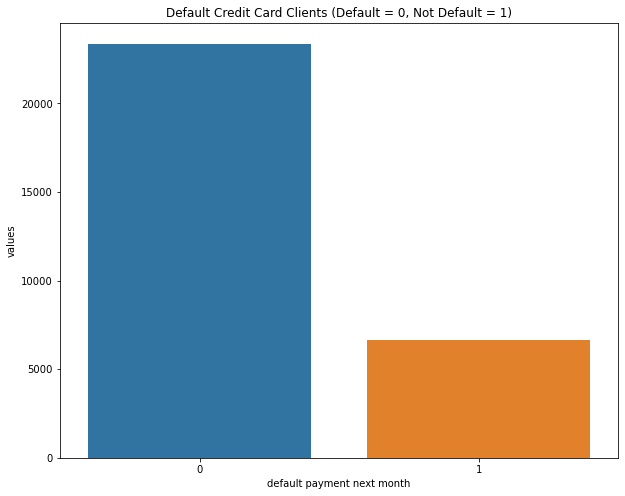

In [5]:
plt.figure(figsize = (10,8))
plt.title('Default Credit Card Clients (Default = 0, Not Default = 1)')
sns.barplot(x = 'default payment next month', y='values', data=df)
plt.show()

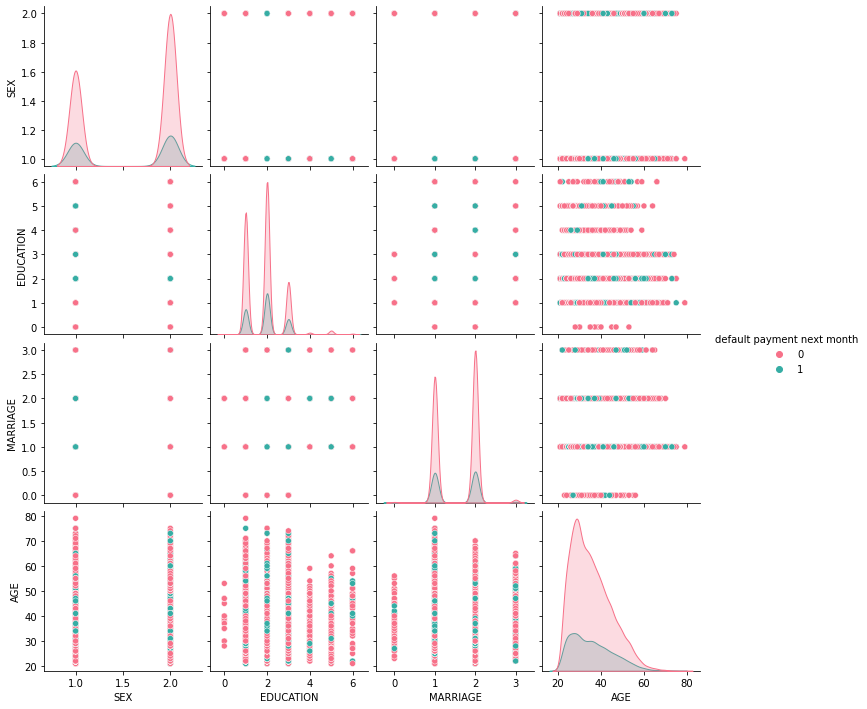

In [6]:
'''
sns.pairplot(data[["AGE", 
                   "PAY_0", "PAY_2", "PAY_3", "PAY_4","PAY_5","PAY_6",
                   "BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4", "BILL_AMT5","BILL_AMT6",
                   "PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6","default payment next month"]], hue = "default payment next month", 
            diag_kind='kde', kind='scatter', palette='husl')
plt.show()
'''
sns.pairplot(data[["SEX",'EDUCATION', 'MARRIAGE','AGE',
                   "default payment next month"]], hue = "default payment next month", 
            diag_kind='kde', kind='scatter', palette='husl')
plt.show()

The result shows that '0' is much more than '1'. This is an imbalance classification.

## Correlation matrix plot 

<AxesSubplot:>

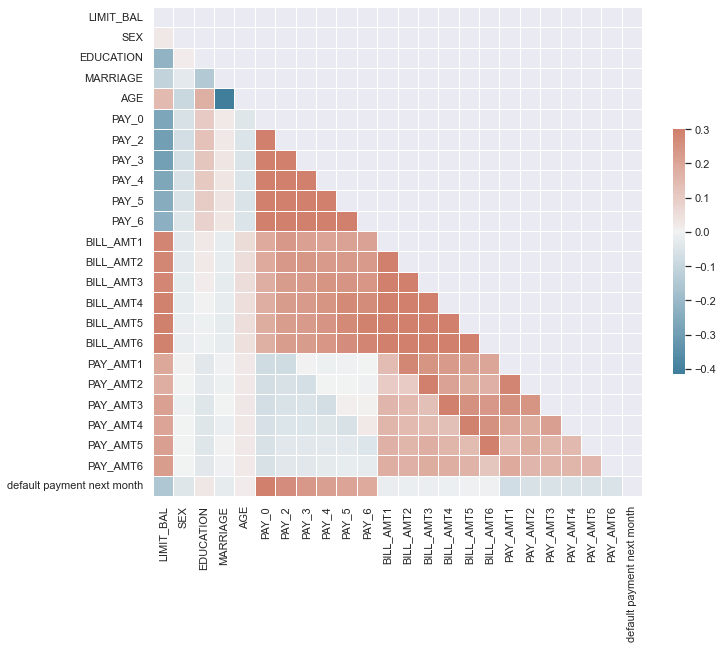

In [7]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(265)
d = data.drop(columns=['ID'])

sns.set(rc = {'figure.figsize':(20,10)})

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#annot = True, annot_kws = {"size": 5}

The default payment next month is highly related with PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6. 

## Relationship of features

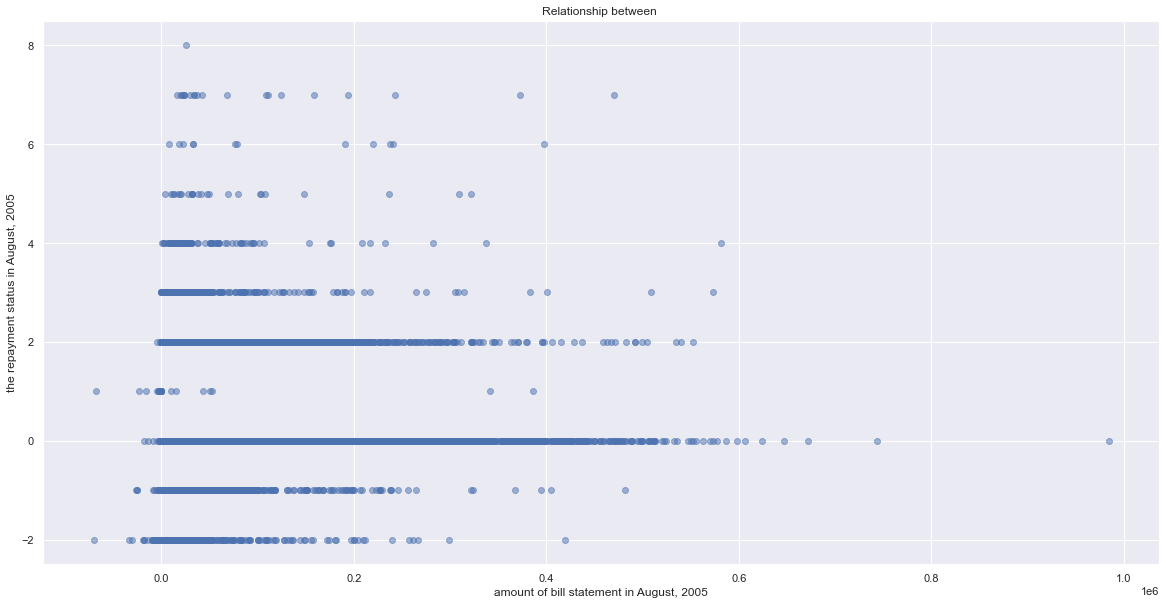

In [8]:
plt.scatter(data['BILL_AMT2'],data['PAY_2'],alpha=0.5 )
#Adding the aesthetics
plt.title('Relationship between ')
plt.xlabel('amount of bill statement in August, 2005')
plt.ylabel('the repayment status in August, 2005') 
#Show the plot
plt.show()

This is a scatterplot showing the relationship between amount of bill statement and the repayment status. From this scatterplot, we can see that it is not the case that the higher the amount of bill statement, the more likely that the bill is repaid late (or even not paid). The relationship between the two variables is weak.

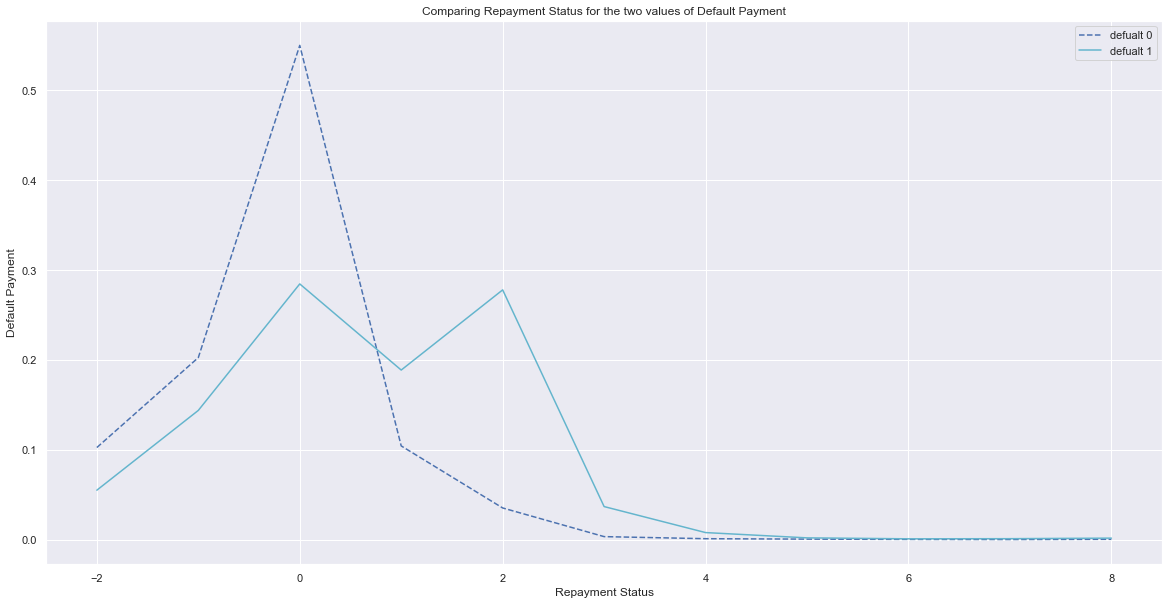

In [9]:
repayment_status = data['PAY_0']
default_0_count = 0
default_0_nega2 = 0
default_0_nega1 = 0
default_0_0 = 0
default_0_1 = 0
default_0_2 = 0
default_0_3 = 0
default_0_4 = 0
default_0_5 = 0
default_0_6 = 0
default_0_7 = 0
default_0_8 = 0
default_1_count = 0
default_1_nega2 = 0
default_1_nega1 = 0
default_1_0 = 0
default_1_1 = 0
default_1_2 = 0
default_1_3 = 0
default_1_4 = 0
default_1_5 = 0
default_1_6 = 0
default_1_7 = 0
default_1_8 = 0

for i in range(len(repayment_status)):
    if data['default payment next month'][i] == 0:
        default_0_count = default_0_count + 1
        if repayment_status.iloc[i] == -2:
            default_0_nega2 = default_0_nega2 + 1
        elif repayment_status.iloc[i] == -1:
            default_0_nega1 = default_0_nega1 + 1
        elif repayment_status.iloc[i] == 0:
            default_0_0 = default_0_0 + 1
        elif repayment_status.iloc[i] == 1:
            default_0_1 = default_0_1 + 1
        elif repayment_status.iloc[i] == 2:
            default_0_2 = default_0_2 + 1
        elif repayment_status.iloc[i] == 3:
            default_0_3 = default_0_3 + 1
        elif repayment_status.iloc[i] == 4:
            default_0_4 = default_0_4 + 1
        elif repayment_status.iloc[i] == 5:
            default_0_5 = default_0_5 + 1
        elif repayment_status.iloc[i] == 6:
            default_0_6 = default_0_6 + 1
        elif repayment_status.iloc[i] == 7:
            default_0_7 = default_0_7 + 1
        elif repayment_status.iloc[i] == 8:
            default_0_8 = default_0_8 + 1
    elif data['default payment next month'][i] == 1:
        default_1_count = default_1_count +1
        if repayment_status.iloc[i] == -2:
            default_1_nega2 = default_1_nega2 + 1
        elif repayment_status.iloc[i] == -1:
            default_1_nega1 = default_1_nega1 + 1
        elif repayment_status.iloc[i] == 0:
            default_1_0 = default_1_0 + 1
        elif repayment_status.iloc[i] == 1:
            default_1_1 = default_1_1 + 1
        elif repayment_status.iloc[i] == 2:
            default_1_2 = default_1_2 + 1
        elif repayment_status.iloc[i] == 3:
            default_1_3 = default_1_3 + 1
        elif repayment_status.iloc[i] == 4:
            default_1_4 = default_1_4 + 1
        elif repayment_status.iloc[i] == 5:
            default_1_5 = default_1_5 + 1
        elif repayment_status.iloc[i] == 6:
            default_1_6 = default_1_6 + 1
        elif repayment_status.iloc[i] == 7:
            default_1_7 = default_1_7 + 1
        elif repayment_status.iloc[i] == 8:
            default_1_8 = default_1_8 + 1

            
import numpy as np
import matplotlib.pyplot as plt
bill_0 = np.array([default_0_nega2/default_0_count,default_0_nega1/default_0_count,
                  default_0_0/default_0_count,default_0_1/default_0_count,
                  default_0_2/default_0_count,default_0_3/default_0_count,
                  default_0_4/default_0_count,default_0_5/default_0_count,
                  default_0_6/default_0_count,default_0_7/default_0_count,
                  default_0_8/default_0_count])
bill_1 = np.array([default_1_nega2/default_1_count,default_1_nega1/default_1_count,
                  default_1_0/default_1_count,default_1_1/default_1_count,
                  default_1_2/default_1_count,default_1_3/default_1_count,
                  default_1_4/default_1_count,default_1_5/default_1_count,
                  default_1_6/default_1_count,default_1_7/default_1_count,
                  default_1_8/default_1_count])
bill = np.array([-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.xlabel("Repayment Status")
plt.ylabel("Default Payment")
plt.title("Comparing Repayment Status for the two values of Default Payment")
plt.plot(bill,bill_0,'b--',label="defualt 0")
plt.plot(bill,bill_1,'c-',label="defualt 1")
plt.legend()
plt.show()

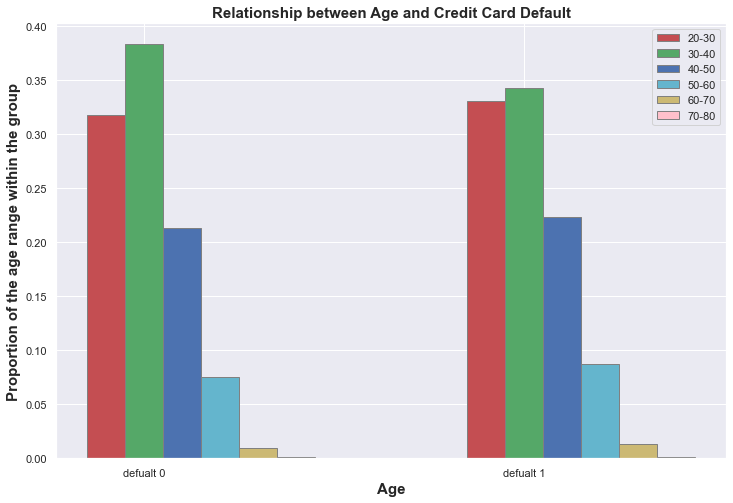

In [10]:
D_0 = 0
D_0_2 = 0
D_0_3 = 0
D_0_4 = 0
D_0_5 = 0
D_0_6 = 0
D_0_7 = 0
D_1 = 0
D_1_2 = 0
D_1_3 = 0
D_1_4 = 0
D_1_5 = 0
D_1_6 = 0
D_1_7 = 0
for i in range(len(data)):
    if data['default payment next month'][i] == 0:
        D_0 = D_0 + 1
        if 20 <= data['AGE'][i] < 30:
            D_0_2 = D_0_2 + 1
        elif 30 <= data['AGE'][i] < 40:
            D_0_3 = D_0_3 + 1
        elif 40 <= data['AGE'][i] < 50:
            D_0_4 = D_0_4 + 1
        elif 50 <= data['AGE'][i] < 60:
            D_0_5 = D_0_5 + 1
        elif 60 <= data['AGE'][i] < 70:
            D_0_6 = D_0_6 + 1
        elif 70 <= data['AGE'][i] < 80:
            D_0_7 = D_0_7 + 1
    elif data['default payment next month'][i] == 1:
        D_1 = D_1 + 1
        if 20 <= data['AGE'][i] < 30:
            D_1_2 = D_1_2 + 1
        elif 30 <= data['AGE'][i] < 40:
            D_1_3 = D_1_3 + 1
        elif 40 <= data['AGE'][i] < 50:
            D_1_4 = D_1_4 + 1
        elif 50 <= data['AGE'][i] < 60:
            D_1_5 = D_1_5 + 1
        elif 60 <= data['AGE'][i] < 70:
            D_1_6 = D_1_6 + 1
        elif 70 <= data['AGE'][i] < 80:
            D_1_7 = D_1_7 + 1

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
between20_30 = [D_0_2/D_0,D_1_2/D_1]
between30_40 = [D_0_3/D_0,D_1_3/D_1]
between40_50 = [D_0_4/D_0,D_1_4/D_1]
between50_60 = [D_0_5/D_0,D_1_5/D_1]
between60_70 = [D_0_6/D_0,D_1_6/D_1]
between70_80 = [D_0_7/D_0,D_1_7/D_1]
 
# Set position of bar on X axis
br1 = np.arange(len(between20_30))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
 
# Make the plot
plt.bar(br1, between20_30, color ='r', width = barWidth,
        edgecolor ='grey', label ='20-30')
plt.bar(br2, between30_40, color ='g', width = barWidth,
        edgecolor ='grey', label ='30-40')
plt.bar(br3, between40_50, color ='b', width = barWidth,
        edgecolor ='grey', label ='40-50')
plt.bar(br4, between50_60, color ='c', width = barWidth,
        edgecolor ='grey', label ='50-60')
plt.bar(br5, between60_70, color ='y', width = barWidth,
        edgecolor ='grey', label ='60-70')
plt.bar(br6, between70_80, color ='pink', width = barWidth,
        edgecolor ='grey', label ='70-80')

# Adding Xticks
plt.xlabel('Age', fontweight ='bold', fontsize = 15)
plt.ylabel('Proportion of the age range within the group', fontweight ='bold', fontsize = 15)
plt.title("Relationship between Age and Credit Card Default",fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(between20_30))],
        ['defualt 0', 'defualt 1'])
 
plt.legend()
plt.show()

## Check missing value

In [11]:
data.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

We can see that the data type of all the attributes are integers and there does not exist NAN. 

## Statistical Description

In [12]:
# simple statistical description of data
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
cols = data.columns.tolist()

# we do not need the following column to do analysis
for it in ["ID", "SEX", "EDUCATION", "MARRIAGE", "default payment next month"]:
    cols.remove(it)

<AxesSubplot:>

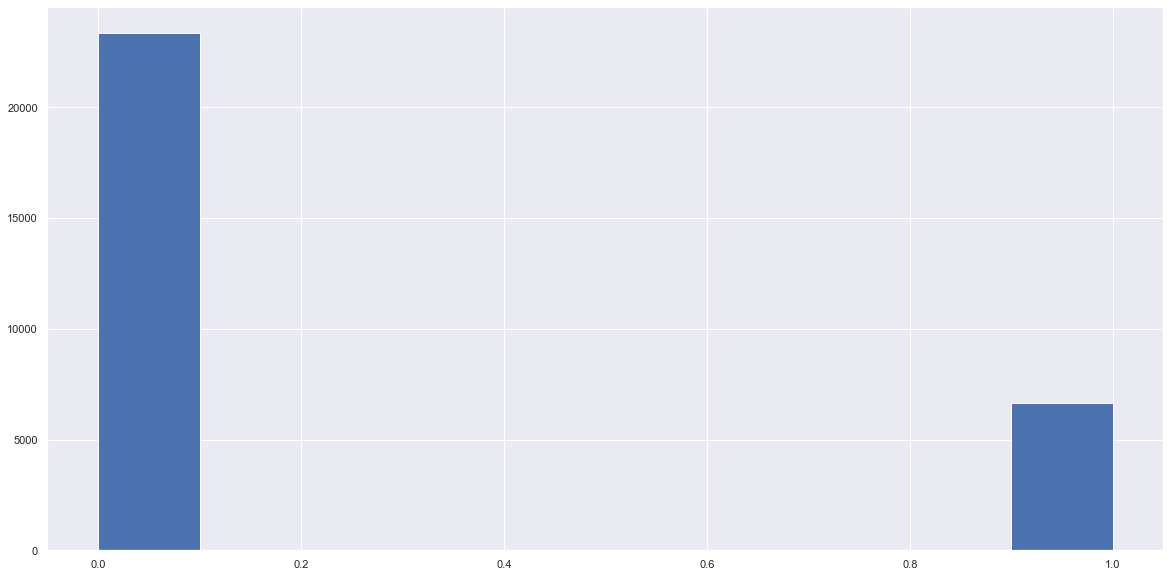

In [14]:
# here, we would like to see the distribution of the "default payment next month"
data["default payment next month"].hist()

## Distribution of Numerical Features

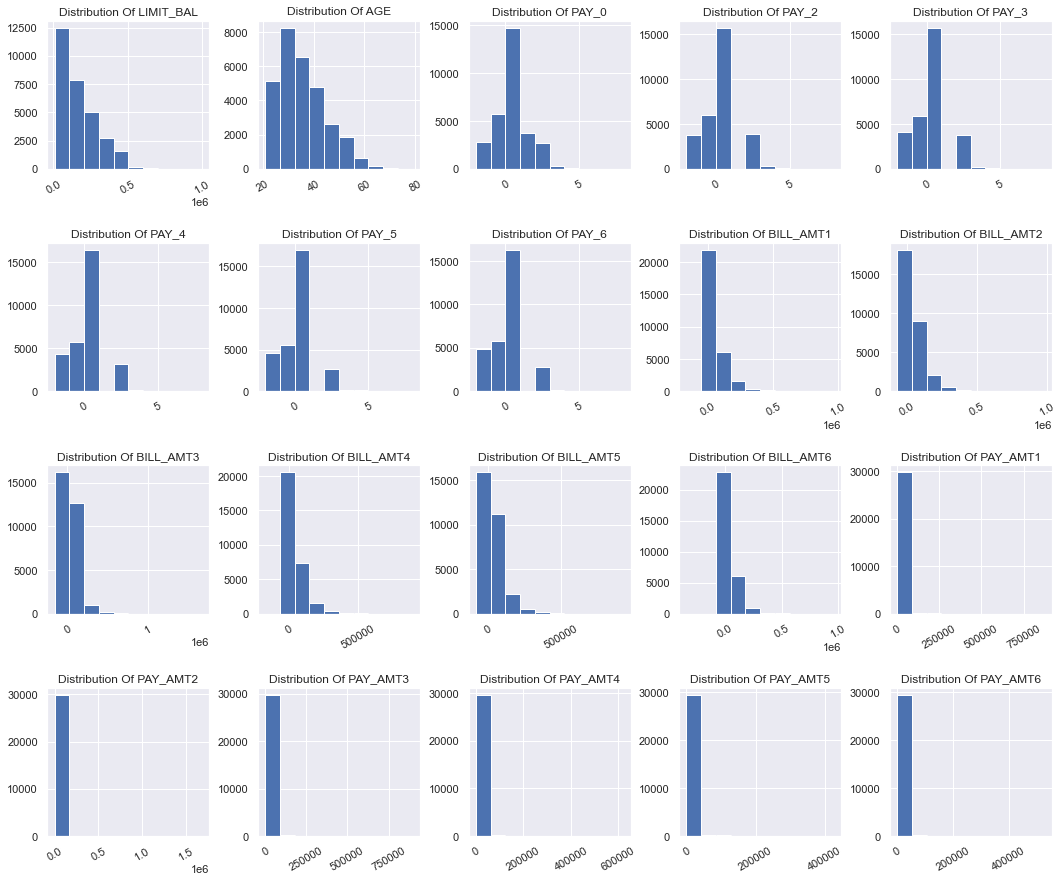

In [15]:
# see the distribution of all the attributes
fig = plt.figure(figsize=(18, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
for i in range(len(cols)):
    plt.subplot(4, 5, i+1)
    plt.xticks(rotation=30)
    data[cols[i]].hist()
    plt.title(f"Distribution Of {cols[i]}")
plt.show()

## Boxplot of Numerical Values 

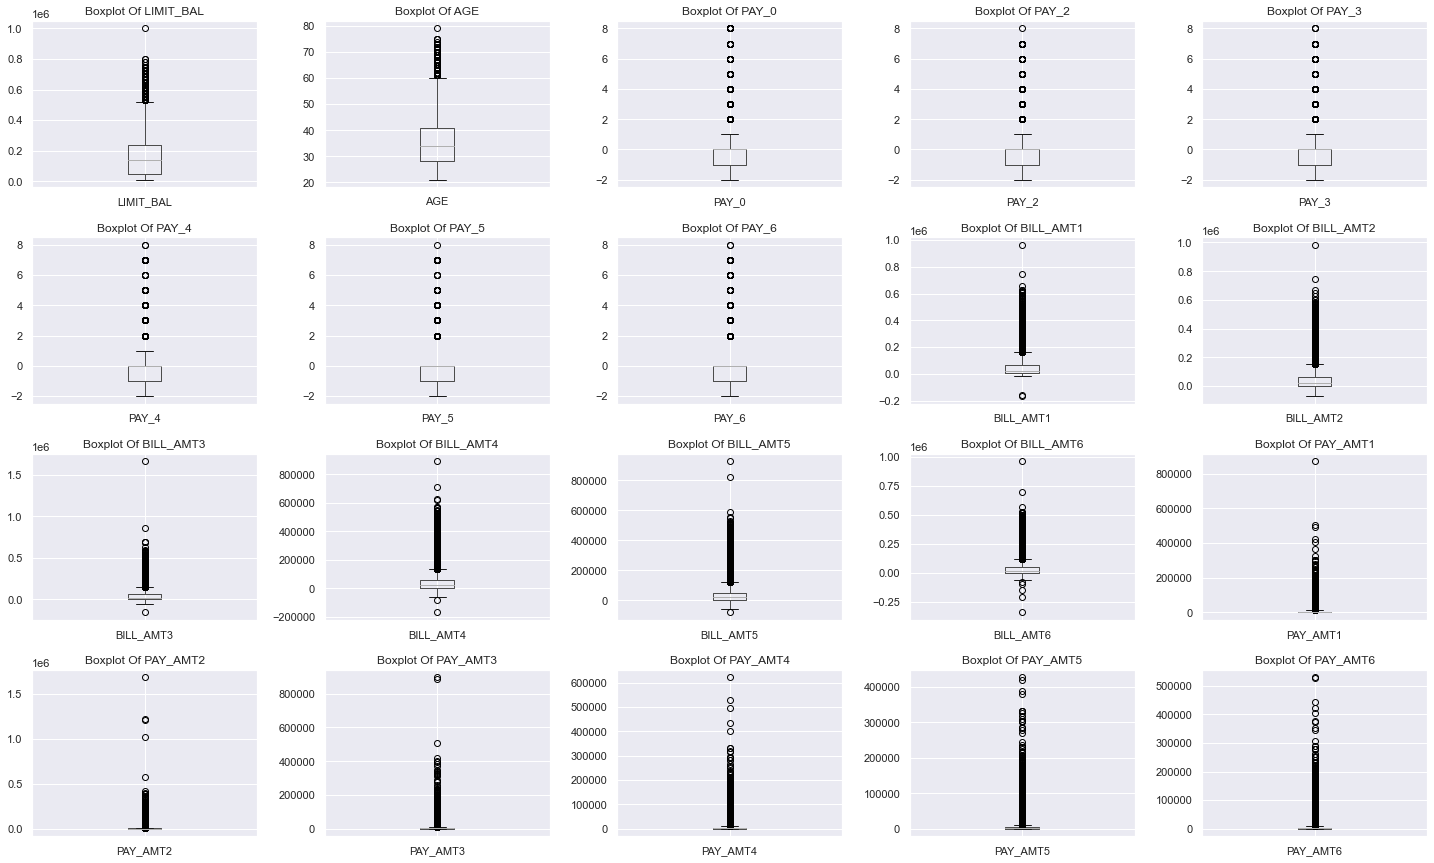

In [16]:
# see the distribution of all the attributes
fig = plt.figure(figsize=(25, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(cols)):
    plt.subplot(4, 5, i+1)
    data.boxplot(column=cols[i])
    plt.title(f"Boxplot Of {cols[i]}")
plt.show()

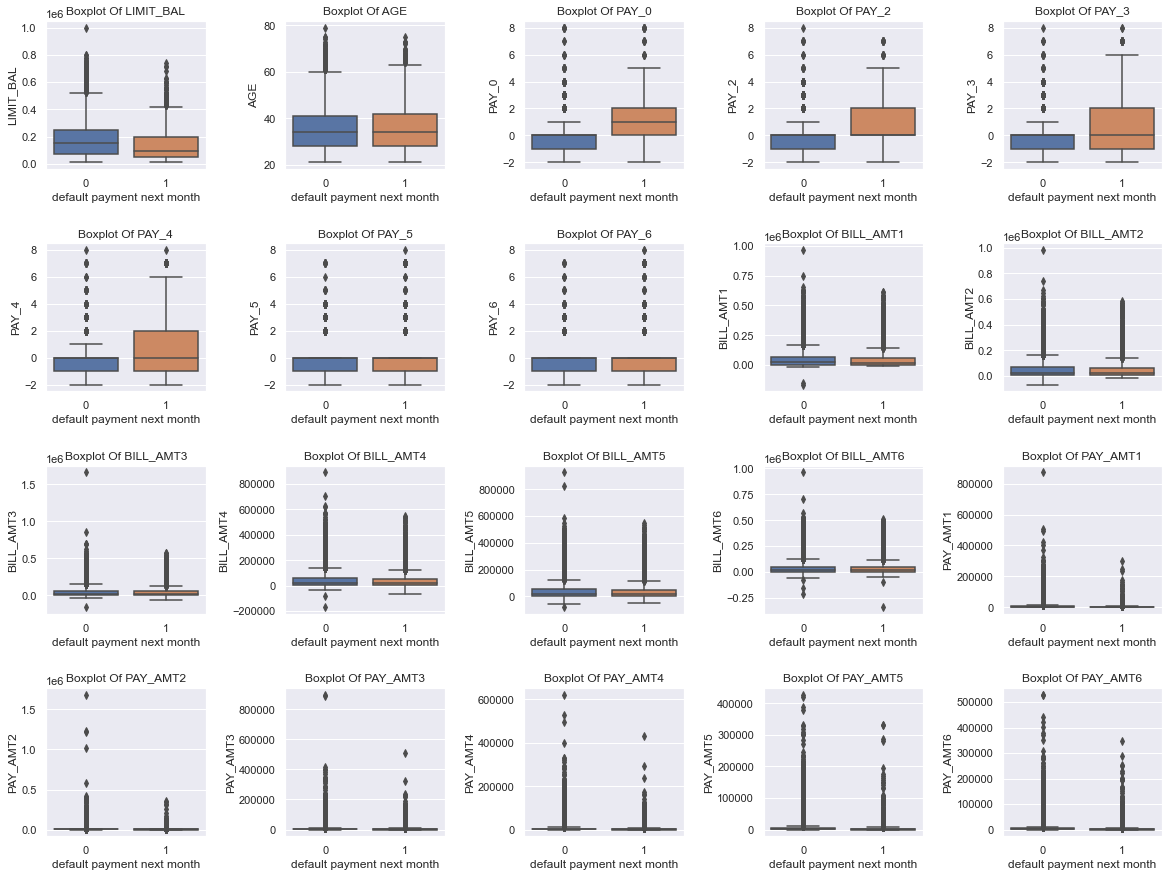

In [17]:
# see the distribution of all the attributes
fig = plt.figure(figsize=(20, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(len(cols)):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x="default payment next month", y=cols[i], data=data)
    plt.title(f"Boxplot Of {cols[i]}")
plt.show()

## Marriage vs Education Segregated by Gender 

In [18]:
data.groupby("default payment next month")['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE','AGE'].agg([np.mean, np.median])

/var/folders/wt/ft7pqc0j109fmn7xktkt7kp00000gn/T/ipykernel_8093/2182524604.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby("default payment next month")['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE','AGE'].agg([np.mean, np.median])


LIMIT_BAL                 SEX         \
                                     mean    median      mean median   
default payment next month                                             
0                           178099.726074  150000.0  1.614150    2.0   
1                           130109.656420   90000.0  1.567058    2.0   

                           EDUCATION         MARRIAGE               AGE         
                                mean median      mean median       mean median  
default payment next month                                                      
0                           1.841337    2.0  1.558637    2.0  35.417266   34.0  
1                           1.894665    2.0  1.528029    2.0  35.725738   34.0

/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


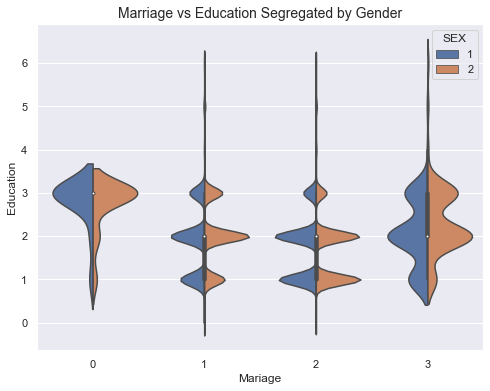

In [19]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(data.MARRIAGE, data.EDUCATION, hue=data.SEX, split=True)
plt.title("Marriage vs Education Segregated by Gender", fontsize=14)
plt.xlabel("Mariage", fontsize=12)
plt.ylabel("Education", fontsize=12)
plt.show()

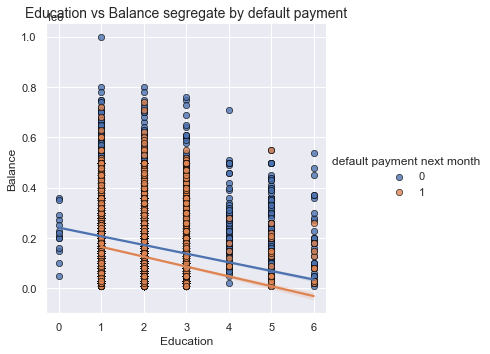

In [20]:
sns.lmplot(x="EDUCATION", y="LIMIT_BAL", 
           hue="default payment next month", data=data, scatter_kws=dict(s=40, linewidths=0.7,
                                            edgecolors='black'))
plt.xlabel("Education", fontsize=12)
plt.ylabel("Balance", fontsize=12)
plt.title("Education vs Balance segregate by default payment", fontsize=14)
plt.show()

## Relationship between Marital Status and default payment

In [21]:
data[data['default payment next month']==0]['MARRIAGE'].value_counts()

2    12623
1    10453
3      239
0       49
Name: MARRIAGE, dtype: int64

In [22]:
data[data['default payment next month']==1]['MARRIAGE'].value_counts()

2    3341
1    3206
3      84
0       5
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'default = 1')

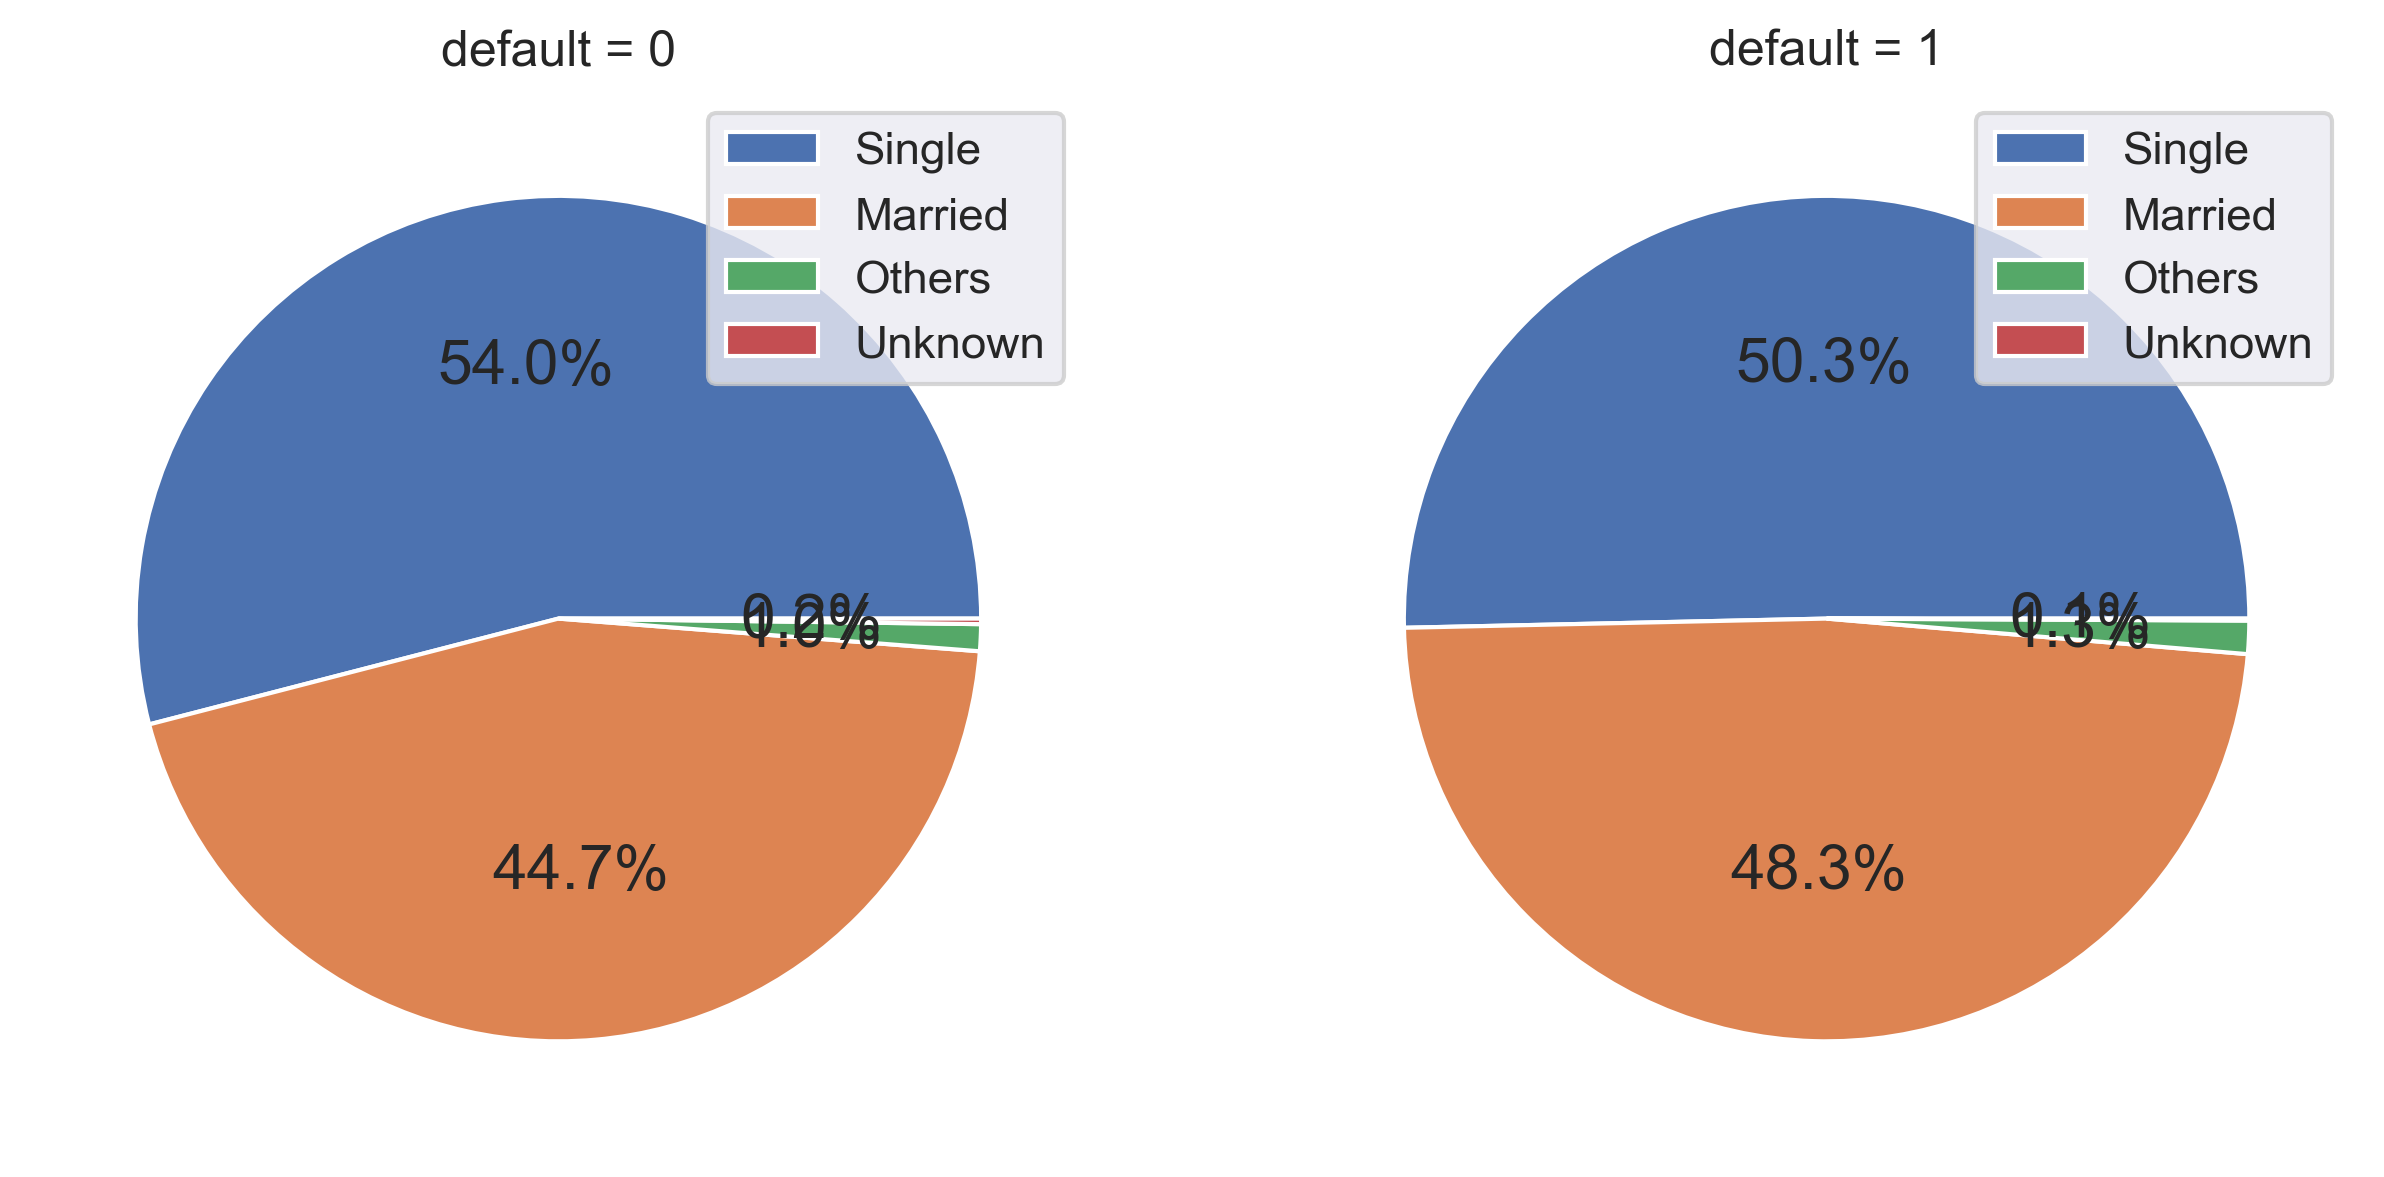

In [23]:
fig = plt.figure(figsize=(10,6),dpi=300)
#First pie chart:
ax1 = fig.add_subplot(121)
cts = data[data['default payment next month']==0]['MARRIAGE'].value_counts()
ax1.pie(cts,labels = ['','','',''], autopct='%1.1f%%', textprops = {"fontsize":15})
ax1.legend(labels=['Single', 'Married','Others','Unknown'])
plt.title('default = 0')

#Second pie chart:
ax2 = fig.add_subplot(122)
cts2 = data[data['default payment next month']==1]['MARRIAGE'].value_counts()
ax2.pie(cts2,labels = ['','','',''], autopct='%1.1f%%', textprops = {"fontsize":15})
ax2.legend(labels=['Single', 'Married','Others','Unknown'])
plt.title('default = 1')

Married people have higher probability to pay default payment. And for the single, there are more people does not need to pay for the default.

## Relationship between Education and default payment

In [24]:
data[data['default payment next month']==0]['EDUCATION'].value_counts()

2    10700
1     8549
3     3680
5      262
4      116
6       43
0       14
Name: EDUCATION, dtype: int64

In [25]:
data[data['default payment next month']==1]['EDUCATION'].value_counts()

2    3330
1    2036
3    1237
5      18
6       8
4       7
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, 'default = 1')

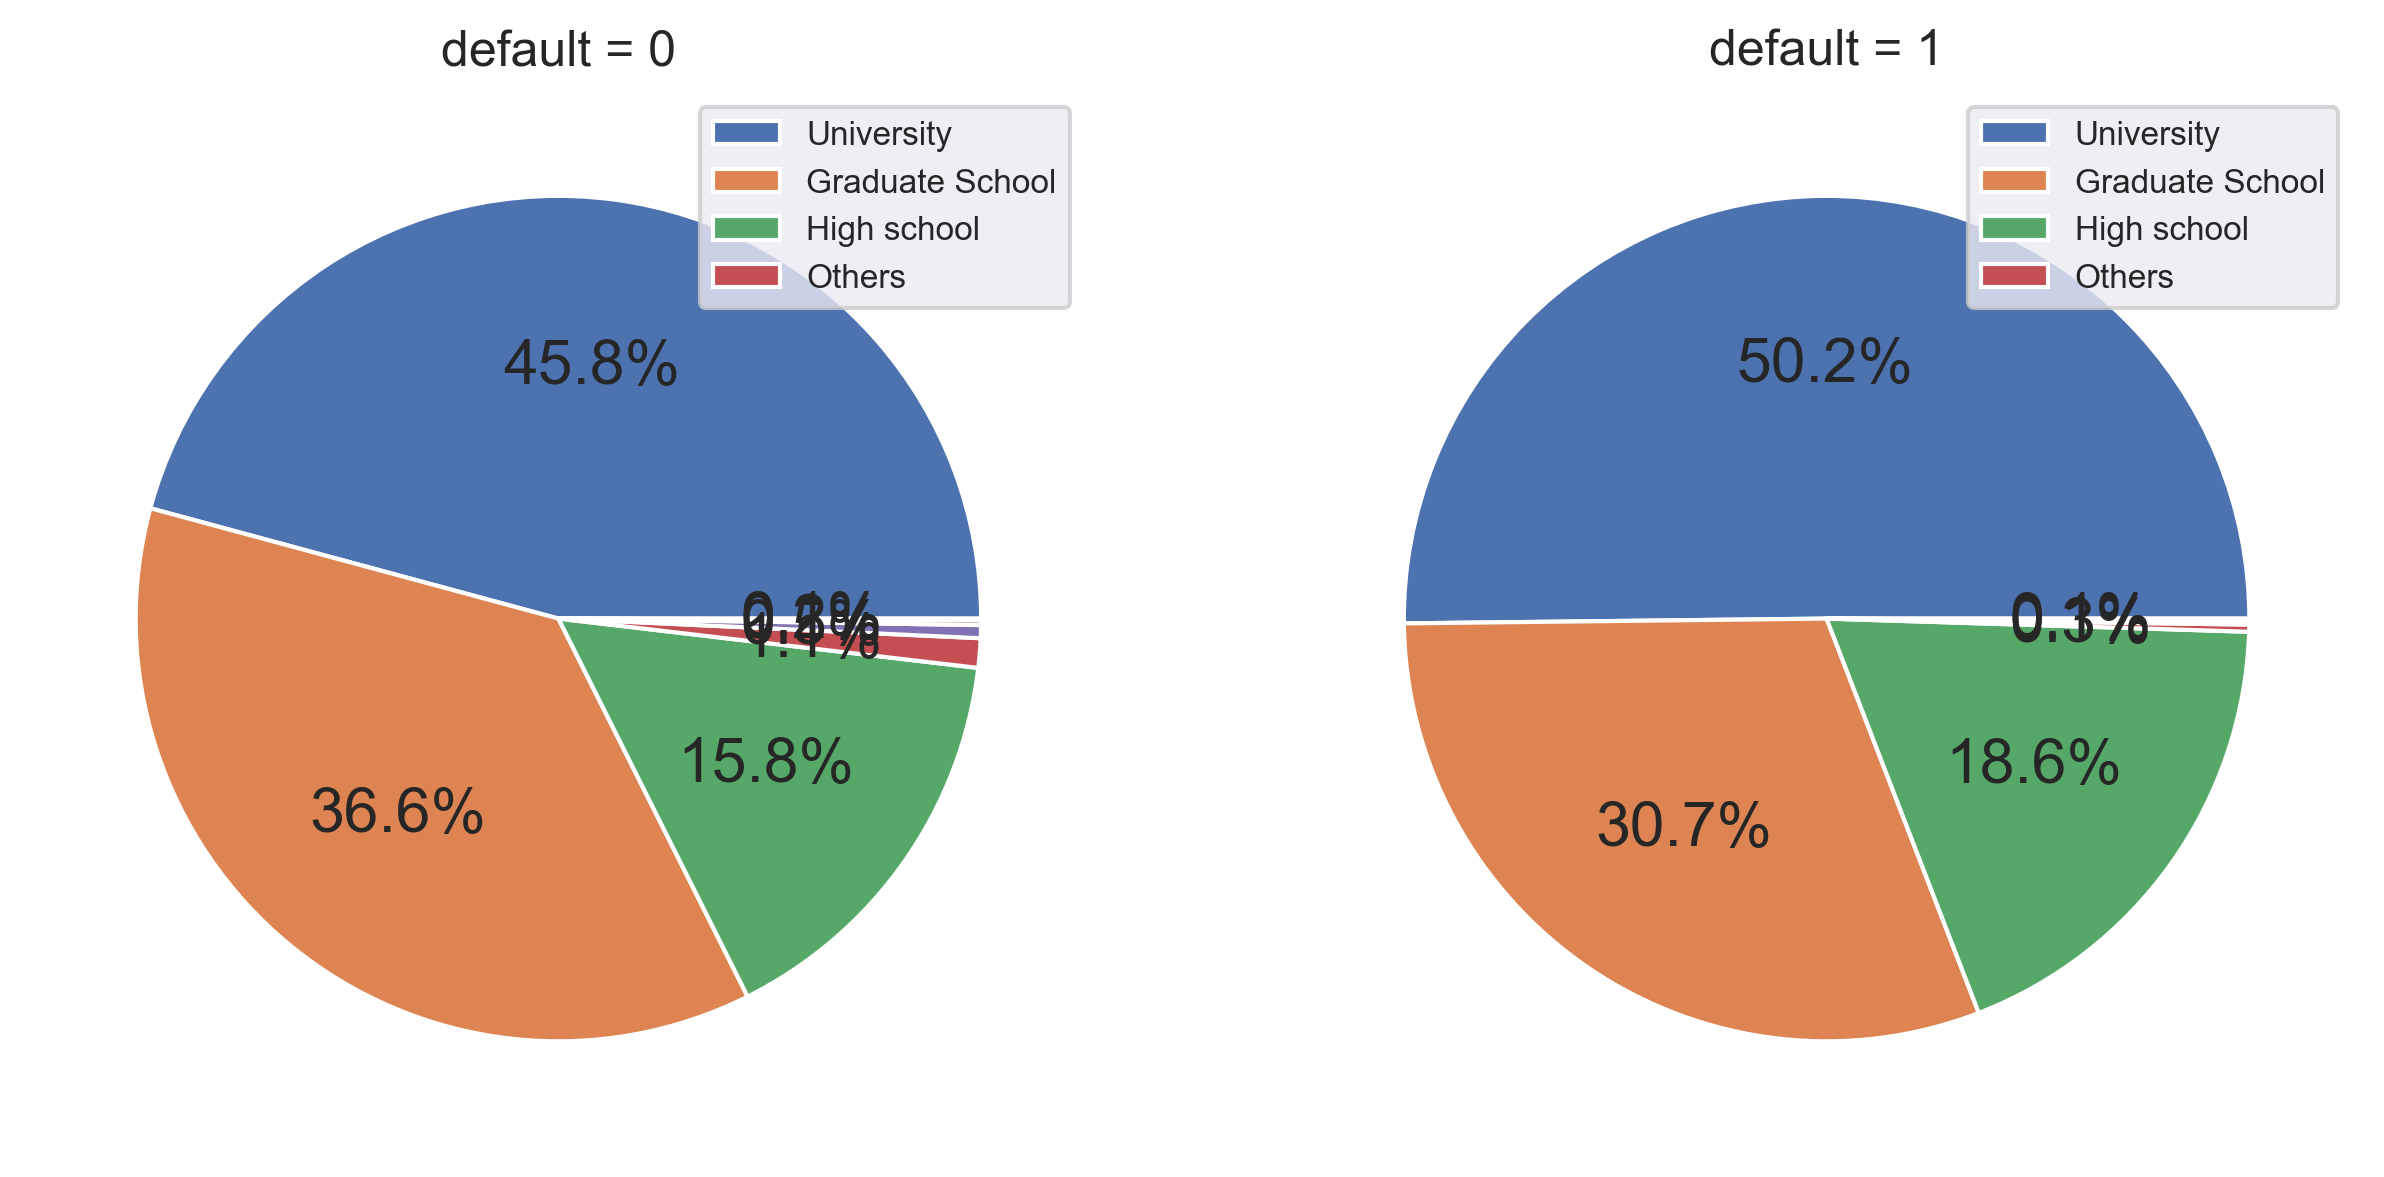

In [26]:
fig = plt.figure(figsize=(10,6),dpi=300)
#First pie chart:
ax1 = fig.add_subplot(121)
cts = data[data['default payment next month']==0]['EDUCATION'].value_counts()
ax1.pie(cts,labels = ['','','','','','',''], autopct='%1.1f%%', textprops = {"fontsize":15})
ax1.legend(labels=['University', 'Graduate School','High school','Others'],prop={'size': 8})
plt.title('default = 0')

#Second pie chart:
ax2 = fig.add_subplot(122)
cts2 = data[data['default payment next month']==1]['EDUCATION'].value_counts()
ax2.pie(cts2,labels = ['','','','','',''], autopct='%1.1f%%', textprops = {"fontsize":15})
ax2.legend(labels=['University', 'Graduate School','High school','Others'],prop={'size': 8})
plt.title('default = 1')

There are more university's and high school's students pay default of the credit card. However, there are more graduate students pay the credit card on time without default payment.

# 2. Data Preprocessing and Feature Engineering

##  Feature Engineering

In [27]:
data = data.drop(columns=['ID'])

## Split dataset and Normalize data

In [31]:
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

In [32]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

y = np.array(y).reshape(-1,1)
y = minmax.fit_transform(y)

# 3. Models Analysis

## KNN Model

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

In [34]:
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
classifier = KNeighborsClassifier(n_neighbors=5)
kfold = StratifiedKFold(n_splits=10, shuffle=False)
# enumerate the splits and summarize the distributions
KNN_accuracy = []
f1_score1=[]
recall1 = []
cf1 = []
for train_ix, valid_ix in kfold.split(X,y):
# select rows
    X_train1, X_valid1 = X[train_ix], X[valid_ix]
    y_train1, y_valid1 = y[train_ix], y[valid_ix]
    classifier.fit(X_train1, y_train1)
    y_pred1 = classifier.predict(X_valid1)
    KNN_accuracy.append(accuracy_score(y_valid1, y_pred1))
    f1_score1.append(f1_score(y_valid1, y_pred1, average='weighted'))
    recall1.append(recall_score(y_valid1, y_pred1))
    cf1.append(confusion_matrix(y_valid1, y_pred1))


/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when

In [35]:
# The accuracy, f1_score, and the recall rate are the mean of the 10 folds data values
df1 = {"Item":["Accuracy","F1 score of KNN","Recall score"],
       "Score": [np.mean(KNN_accuracy),np.mean(f1_score1),np.mean(recall1)]} 
acc1 = pd.DataFrame(df1)
acc1

,Item,Score
0,Accuracy,0.792367
1,F1 score of KNN,0.774354
2,Recall score,0.349461


In [36]:
#Confusion matrix is the sum of the 10 confusion matrices:
cf_matrix1 = np.sum(cf1,axis=0)

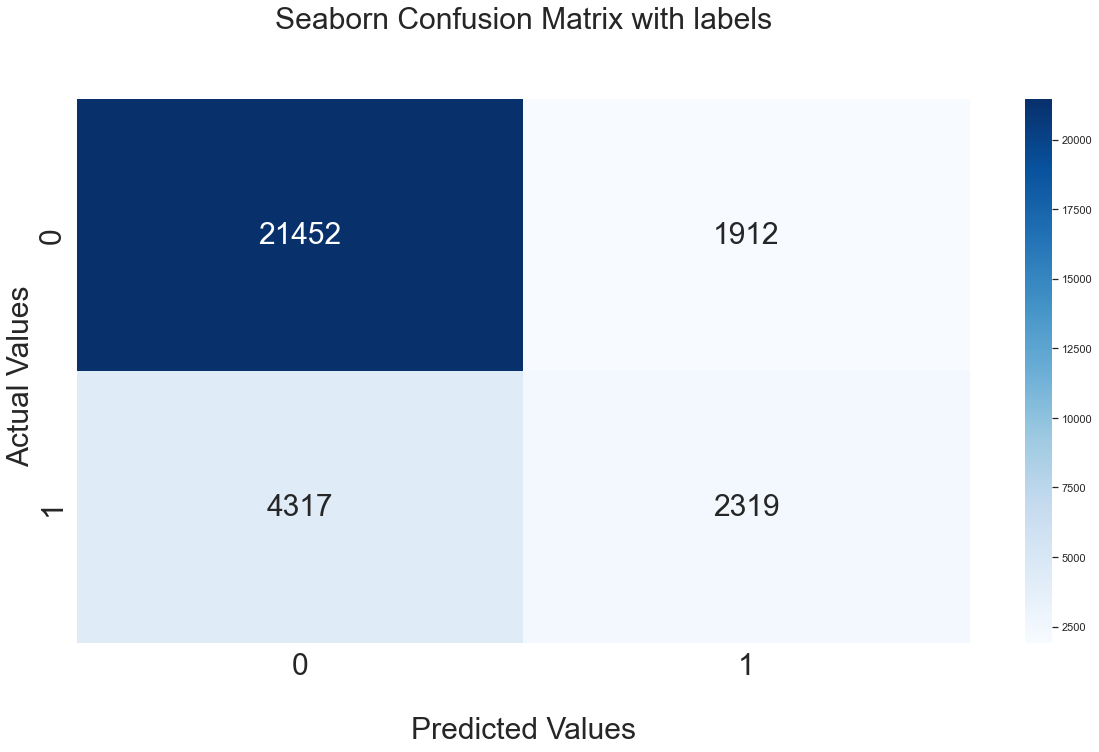

In [37]:
ax = sns.heatmap(cf_matrix1, annot=True, cmap='Blues',fmt='d',annot_kws={"size": 30})

ax.set_title('Seaborn Confusion Matrix with labels\n\n',fontsize=30);
ax.set_xlabel('\nPredicted Values',fontsize=30)
ax.set_ylabel('Actual Values ',fontsize=30);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'],fontsize=30)
ax.yaxis.set_ticklabels(['0','1'],fontsize=30)

## Display the visualization of the Confusion Matrix.
plt.show()

## Logistic Regression

In [38]:
from sklearn.metrics import roc_curve,auc
from scipy import interp

/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/wt/ft7pqc0j109fmn7xktkt7kp00000gn/T/ipykernel_8093/1448563837.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr

/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/wt/ft7pqc0j109fmn7xktkt7kp00000gn/T/ipykernel_8093/1448563837.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


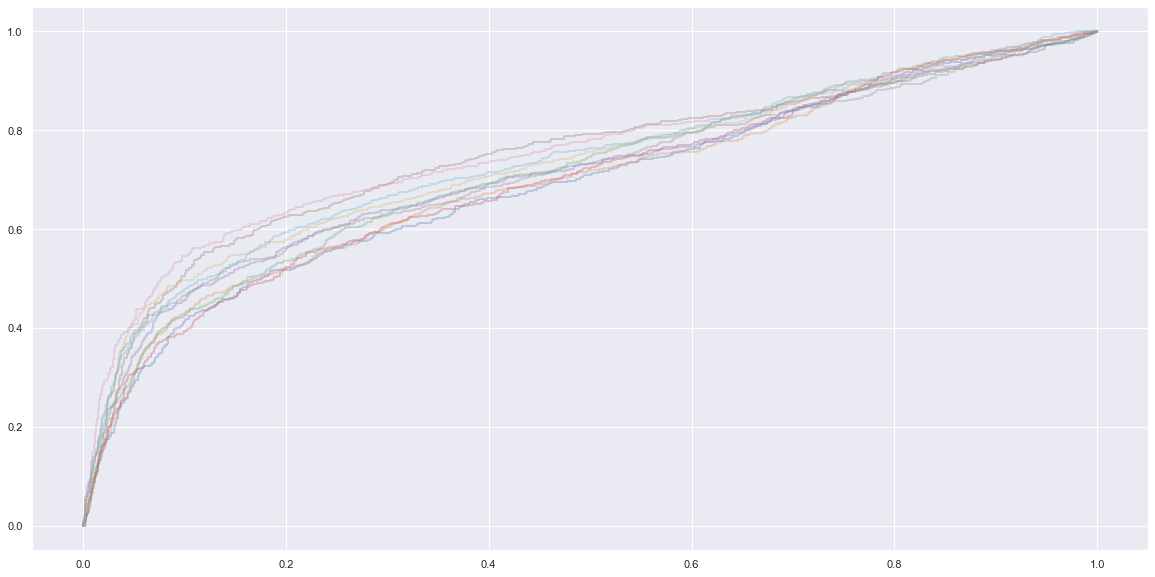

In [39]:
from sklearn.linear_model import LogisticRegression
Reg = LogisticRegression(solver='lbfgs',random_state=265)
kfold = StratifiedKFold(n_splits=10, shuffle=False)
# enumerate the splits and summarize the distributions
Reg_accuracy = []
f1_score3 = []
recall3 = []
cf3 = []

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

for train_ix, valid_ix in kfold.split(X,y):
# select rows
    X_train3, X_valid3 = X[train_ix], X[valid_ix]
    y_train3, y_valid3 = y[train_ix], y[valid_ix]
    Reg.fit(X_train3, y_train3)
    y_pred3 = Reg.predict(X_valid3)
    Reg_accuracy.append(accuracy_score(y_valid3, y_pred3))
    f1_score3.append(f1_score(y_valid3, y_pred3, average='weighted'))
    recall3.append(recall_score(y_valid3, y_pred3))
    cf3.append(confusion_matrix(y_valid3, y_pred3))
    
    prediction = Reg.predict_proba(X_valid3)
    fpr, tpr, t = roc_curve(y_valid3, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    plt.title("")
    i= i+1

In [40]:
df3 = {"Item":["Accuracy","F1 score of Logistic Regression","Recall score"],
       "Score": [np.mean(Reg_accuracy),np.mean(f1_score3),np.mean(recall3)]} 
acc3 = pd.DataFrame(df3)
acc3

,Item,Score
0,Accuracy,0.809600
1,F1 score of Logistic Regression,0.768646
2,Recall score,0.229049


In [41]:
cf_matrix3 = np.sum(cf3,axis=0)

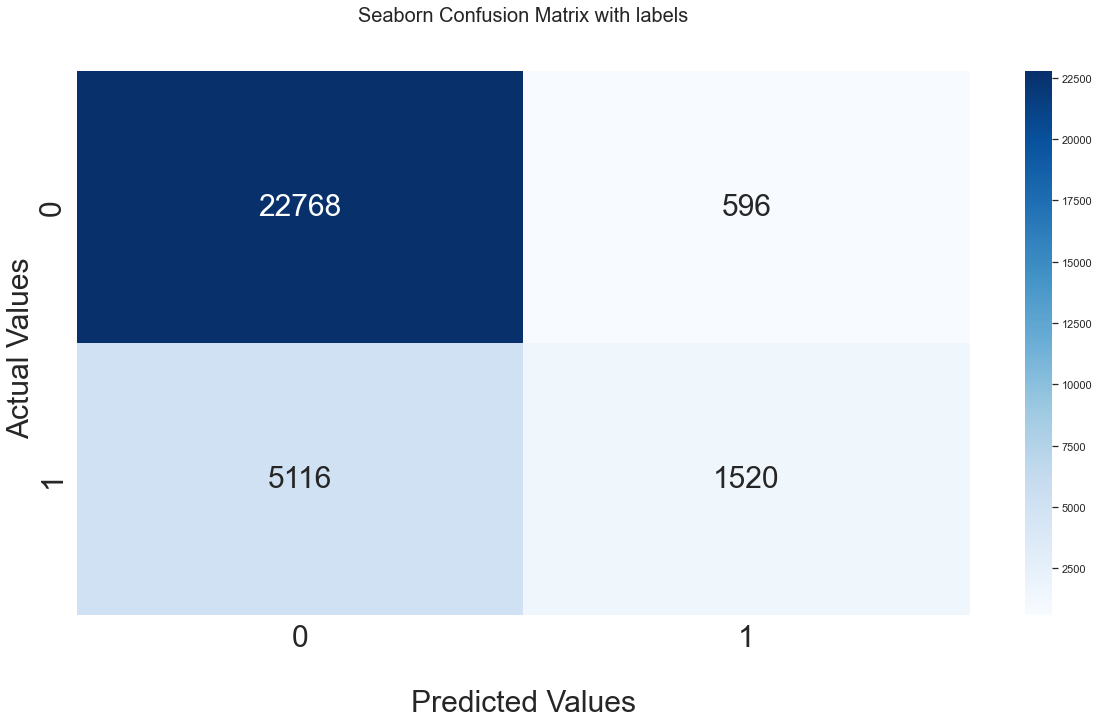

In [42]:
ax = sns.heatmap(cf_matrix3, annot=True, cmap='Blues',fmt='d',annot_kws={"size": 30})

ax.set_title('Seaborn Confusion Matrix with labels\n\n',fontsize=20);
ax.set_xlabel('\nPredicted Values',fontsize=30)
ax.set_ylabel('Actual Values ',fontsize=30);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'],fontsize=30)
ax.yaxis.set_ticklabels(['0','1'],fontsize=30)

## Display the visualization of the Confusion Matrix.
plt.show()

In [43]:
#Make all coefficients to absolute values and rank them:
feature_important = pd.DataFrame({'feature':list(data.drop(columns=['default payment next month']).columns),'feature important': abs(Reg.coef_[0])})
feature_important = feature_important.sort_values('feature important',ascending=False)
feature_important

,feature,feature important
5,PAY_0,5.690854
17,PAY_AMT1,3.274877
11,BILL_AMT1,2.191502
18,PAY_AMT2,2.058050
19,PAY_AMT3,1.839570
20,PAY_AMT4,1.724108
22,PAY_AMT6,1.476377
21,PAY_AMT5,1.204408
6,PAY_2,0.954763
0,LIMIT_BAL,0.935094


Text(0.5, 1.0, 'Feature Important')

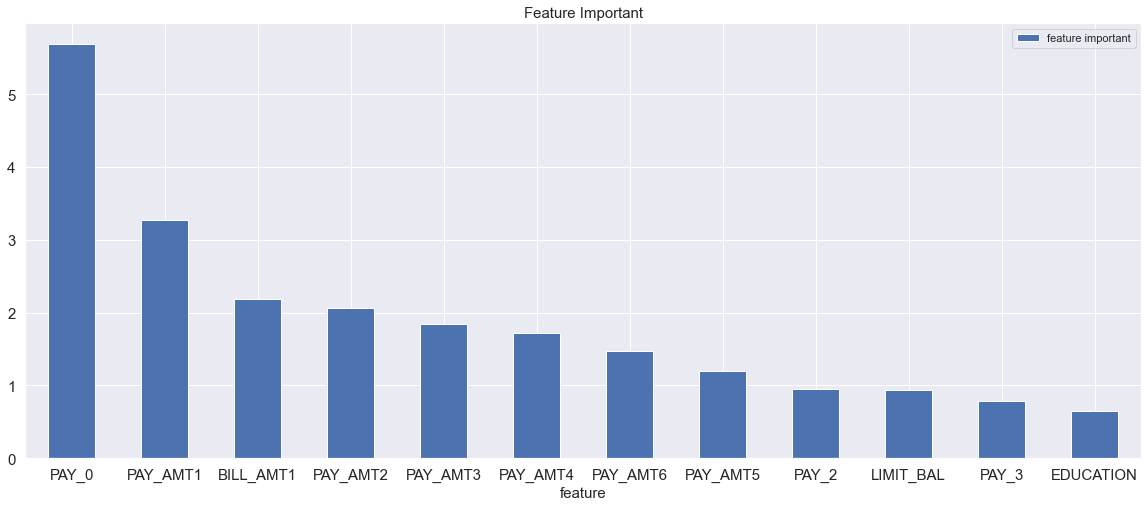

In [44]:
feature = feature_important.head(12)
plt.rcParams["figure.figsize"] = (20,8)
feature.plot.bar(x='feature', y='feature important', rot=0, fontsize=15)
plt.xlabel('feature',fontsize=15)
plt.title('Feature Important',fontsize = 15)

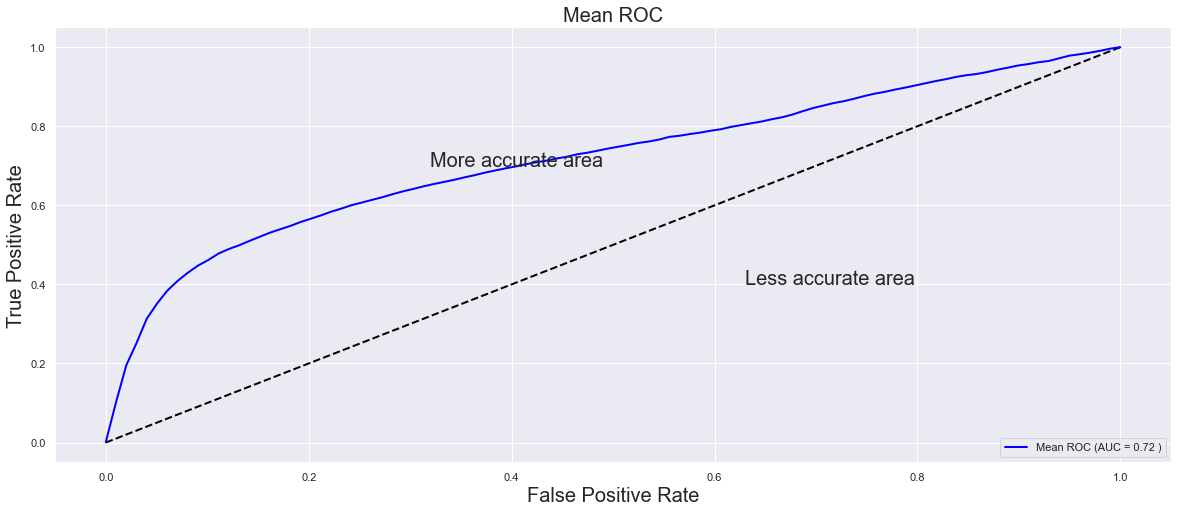

In [45]:
#Mean ROC Curve:
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Mean ROC',fontsize=20)
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 20)
plt.text(0.63,0.4,'Less accurate area',fontsize = 20)
plt.show()

## Neural Network

/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lishangao/opt/a

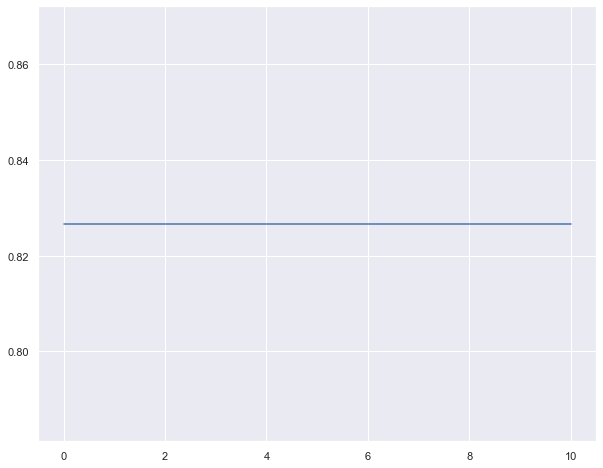

/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lishangao/opt/a

In [46]:
from sklearn.neural_network import MLPClassifier

lrs = [1e-4, 1e-3, 1e-2, 1e-1,1, 10]
accs = []

# use the following name for distinct
X_train_lr, X_valid_lr = X[train_ix], X[valid_ix]
y_train_lr, y_valid_lr = y[train_ix], y[valid_ix]

for lr in lrs:
    clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5, learning_rate_init=lr, hidden_layer_sizes=(5, 2), random_state=1)
    clf1.fit(X_train_lr, y_train_lr)
    y_pred_lr = clf1.predict(X_valid_lr)
    accs.append(accuracy_score(y_valid_lr, y_pred_lr))

fig = plt.figure(figsize=(10, 8))
plt.plot(lrs, accs)
plt.show()



clf1 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
kfold = StratifiedKFold(n_splits=10, shuffle=False)

Neural_accuracy = []
f1_score4 = []
recall4 = []
cf4 = []
for train_ix, valid_ix in kfold.split(X,y):
    X_train4, X_valid4 = X[train_ix], X[valid_ix]
    y_train4, y_valid4 = y[train_ix], y[valid_ix]
    clf1.fit(X_train4, y_train4)
    y_pred4 = clf1.predict(X_valid4)
    Neural_accuracy.append(accuracy_score(y_valid4, y_pred4))
    
    f1_score4.append(f1_score(y_valid4, y_pred4, average='weighted'))
    recall4.append(recall_score(y_valid4, y_pred4))
    cf4.append(confusion_matrix(y_valid4, y_pred4))


In [47]:
def run_nn(lr, batch_size):
    # use the following name for distinct
    X_train_lr, X_valid_lr = X[train_ix], X[valid_ix]
    y_train_lr, y_valid_lr = y[train_ix], y[valid_ix]

    clf1 = MLPClassifier(solver='adam', alpha=1e-5, learning_rate_init=lr, batch_size=batch_size, hidden_layer_sizes=(5, 2), random_state=1)
    clf1.fit(X_train_lr, y_train_lr.reshape(-1))
    y_pred_lr = clf1.predict(X_valid_lr)
    
    return accuracy_score(y_valid_lr.reshape(-1), y_pred_lr.reshape(-1))

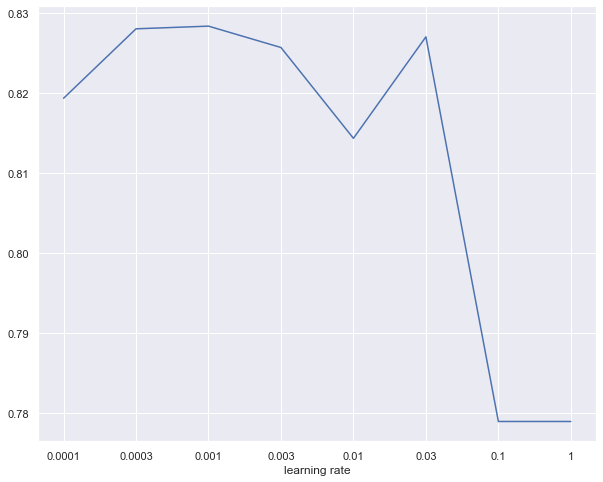

In [48]:
lrs = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 1]
accs = []

for lr in lrs:
    accs.append(run_nn(lr, 20))

fig = plt.figure(figsize=(10, 8))
plt.plot(list(range(len(lrs))), accs)
plt.xticks([i for i in range(len(lrs))], [str(it) for it in lrs])
plt.xlabel("learning rate")
plt.show()

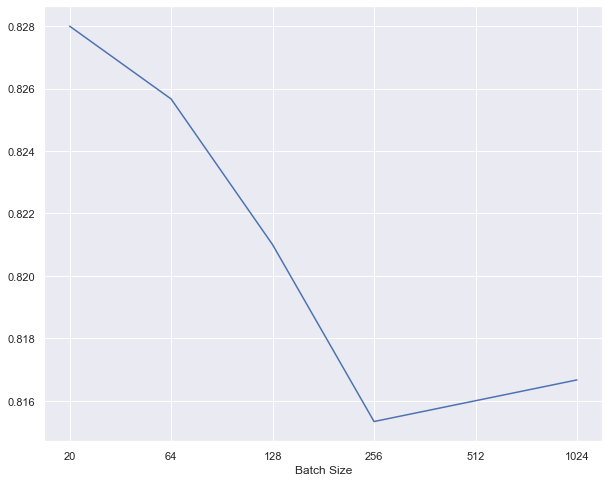

In [49]:
batch_sizes = [20, 64, 128, 256, 512, 1024]
accs = []

for batch_size in batch_sizes:
    accs.append(run_nn(3e-4, batch_size))

fig = plt.figure(figsize=(10, 8))
plt.plot(list(range(len(batch_sizes))), accs)
plt.xticks([i for i in range(len(batch_sizes))], [str(it) for it in batch_sizes])
plt.xlabel("Batch Size")
plt.show()

In [50]:
df4 = {"Item":["Accuracy","F1 score of Neural Accuracy","Recall score"],
       "Score": [np.mean(Neural_accuracy),np.mean(f1_score4),np.mean(recall4)]} 
acc4 = pd.DataFrame(df4)
acc4

,Item,Score
0,Accuracy,0.818867
1,F1 score of Neural Accuracy,0.797082
2,Recall score,0.359262


In [51]:
cf_matrix4 = np.sum(cf4,axis=0)

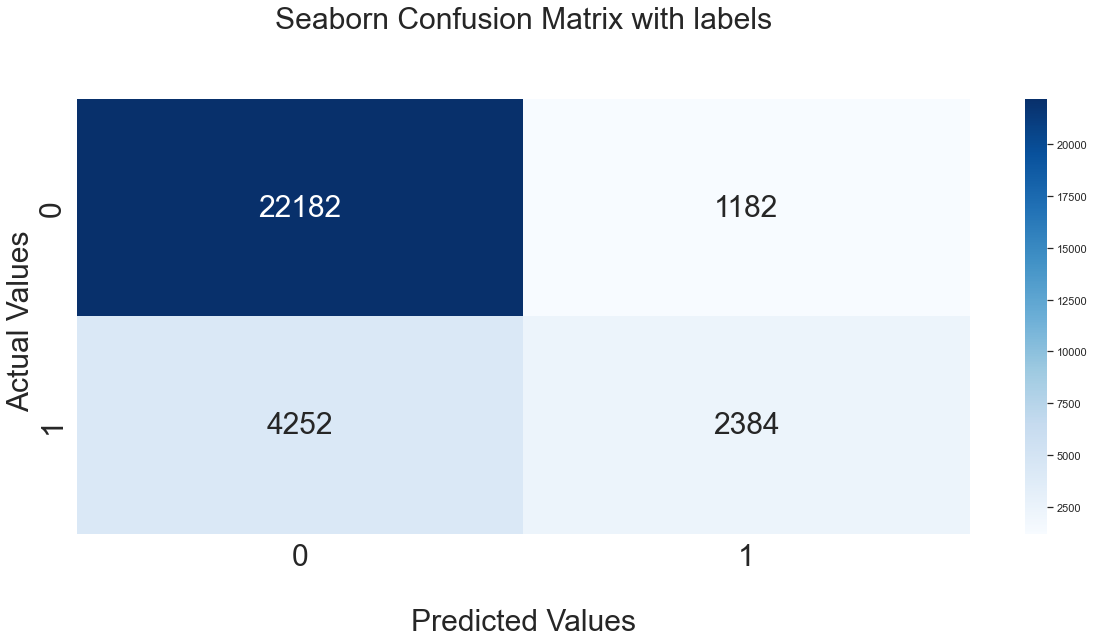

In [52]:
ax = sns.heatmap(cf_matrix4, annot=True, cmap='Blues',fmt='d',annot_kws={"size": 30})

ax.set_title('Seaborn Confusion Matrix with labels\n\n',fontsize=30);
ax.set_xlabel('\nPredicted Values',fontsize=30)
ax.set_ylabel('Actual Values ',fontsize=30);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'],fontsize=30)
ax.yaxis.set_ticklabels(['0','1'],fontsize=30)

## Display the visualization of the Confusion Matrix.
plt.show()

## Model Enhancement - Neural Network

In [53]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,batch_size=32, hidden_layer_sizes=(400,),max_iter=200,activation = 'relu', random_state=1)
kfold = StratifiedKFold(n_splits=10, shuffle=False)

Neural_accuracy2 = []
f1_score6 = []
recall6 = []
cf6 = []
for train_ix, valid_ix in kfold.split(X,y):
    X_train6, X_valid6 = X[train_ix], X[valid_ix]
    y_train6, y_valid6 = y[train_ix], y[valid_ix]
    clf2.fit(X_train6, y_train6)
    y_pred6 = clf2.predict(X_valid6)
    Neural_accuracy2.append(accuracy_score(y_valid6, y_pred6))
    
    f1_score6.append(f1_score(y_valid6, y_pred6, average='weighted'))
    recall6.append(recall_score(y_valid6, y_pred6))
    cf6.append(confusion_matrix(y_valid6, y_pred6))



/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/lishangao/opt/a

In [55]:
df6 = {"Item":["Accuracy","F1 score of Neural Accuracy","Recall score"],
       "Score": [np.mean(Neural_accuracy2),np.mean(f1_score6),np.mean(recall6)]} 
acc6 = pd.DataFrame(df6)
acc6

,Item,Score
0,Accuracy,0.819667
1,F1 score of Neural Accuracy,0.799346
2,Recall score,0.372069


In [56]:
cf_matrix6 = np.sum(cf6,axis=0)

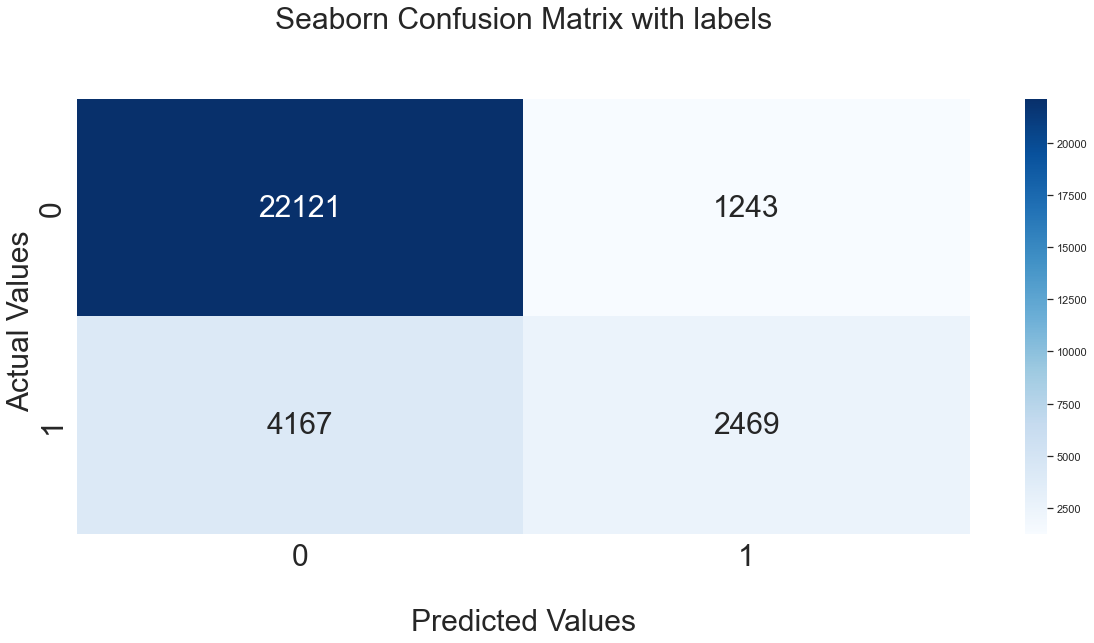

In [57]:
ax = sns.heatmap(cf_matrix6, annot=True, cmap='Blues',fmt='d',annot_kws={"size": 30})

ax.set_title('Seaborn Confusion Matrix with labels\n\n',fontsize=30);
ax.set_xlabel('\nPredicted Values',fontsize=30)
ax.set_ylabel('Actual Values ',fontsize=30);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'],fontsize=30)
ax.yaxis.set_ticklabels(['0','1'],fontsize=30)

## Display the visualization of the Confusion Matrix.
plt.show()